In [1]:
from stock_utils import *

In [2]:
df = pd.DataFrame()
df = df.from_csv('stock_data/spy.csv')
df = df.sort_index(axis=0)

daily_movements = get_price_movement_percentages(df)

In [38]:
def plot_macd_reversals(fast_period, slow_period, viewing_window, ticker, show_ema=True, show_macd_chart=True,
              alpha=0.95, figsize=(16,6), threshold=0, pos_threshold=None, neg_threshold=None):    
    #if ticker is None:
    #    close = get_close_price(df)
    #else:
    if pos_threshold is None:
        pos_threshold = threshold
    if neg_threshold is None:
        neg_threshold = -threshold
    
    df = pd.DataFrame()
    df = df.from_csv('stock_data/' + ticker.lower() +'.csv')
    df = df.sort_index(axis=0)
    close = get_close_price(df)[-viewing_window - 1:]
    
    fast_leg = get_ema(close, fast_period, alpha)
    slow_leg = get_ema(close, slow_period, alpha)
    
    macd = fast_leg - slow_leg
    zero_line = np.zeros(len(macd))
    positive_threshold_line = np.full(len(macd), pos_threshold)
    negative_threshold_line = np.full(len(macd), neg_threshold)
    
    buy_signals = []
    sell_signals = []

    ##================================================================================
    ## Buy and Sell Signals
    ##================================================================================
    for i in range(len(macd)):
        if i == 0: continue
        if macd[i-1] < neg_threshold and macd[i] > macd[i-1]:
            buy_signals.append((i, close[i])) ## TMP
        elif macd[i-1] > pos_threshold and macd[i] < macd[i-1]:
            sell_signals.append((i, close[i]))
    ##================================================================================
    
    plt.figure(figsize=figsize)
    plt.plot(close[-viewing_window:], label='Stock Price')
    if show_ema:
        plt.plot(fast_leg[-viewing_window:], label='Fast EMA')
        plt.plot(slow_leg[-viewing_window:], label='Slow EMA')
        
    plt.title('Stock Price and Signals')
    
    plotted_buy_label = False
    for i in range(len(buy_signals)):
        if buy_signals[i][0] > len(macd) - viewing_window:
            if not plotted_buy_label:
                plt.scatter(buy_signals[i][0] - (len(macd) - viewing_window), buy_signals[i][1], 
                            c='blue', label='Buy Signal')
                plotted_buy_label = True
            else:
                plt.scatter(buy_signals[i][0] - (len(macd) - viewing_window), buy_signals[i][1], 
                            c='blue')

    plotted_sell_label = False
    for i in range(len(sell_signals)):
        if sell_signals[i][0] > len(macd) - viewing_window:
            if not plotted_sell_label:
                plt.scatter(sell_signals[i][0] - (len(macd) - viewing_window), sell_signals[i][1], 
                            c='red', label='Sell Signal')
                plotted_sell_label = True
            else:
                plt.scatter(sell_signals[i][0] - (len(macd) - viewing_window), sell_signals[i][1], 
                            c='red')
        
    plt.legend()
    
    ## MACD
    if show_macd_chart:
        plt.figure(figsize=figsize)
        plt.plot(zero_line[-viewing_window:], c='black')
        plt.plot(positive_threshold_line[-viewing_window:], c='red', linestyle='dotted')
        plt.plot(negative_threshold_line[-viewing_window:], c='red', linestyle='dotted')
        ## positive_threshold_line
        plt.plot(macd[-viewing_window:], label='MACD', c='blue')
        plt.title('MACD')
        plt.legend()
    plt.show()

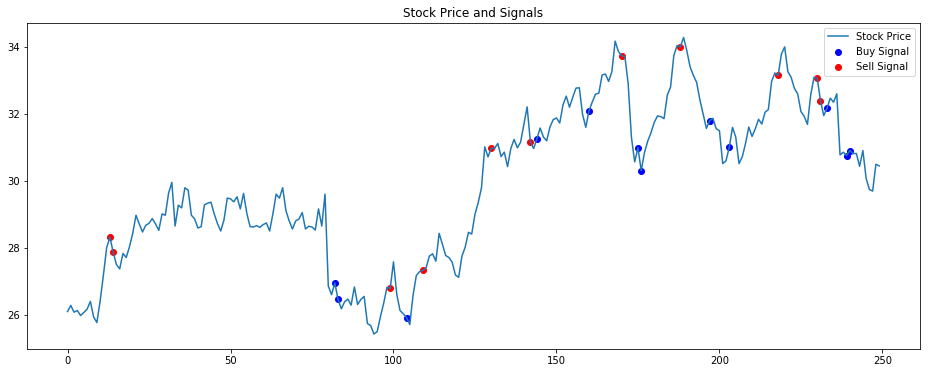

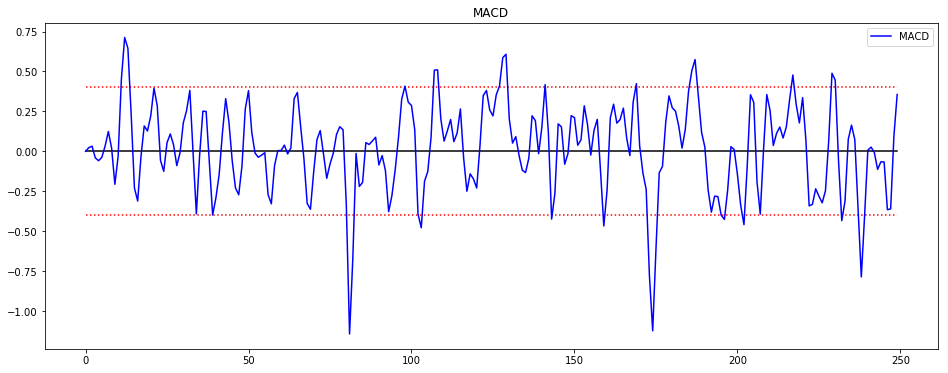

In [45]:
plot_macd_reversals(2, 4, 250, ticker='MGM', pos_threshold=0.4, neg_threshold=-0.4, show_ema=False)

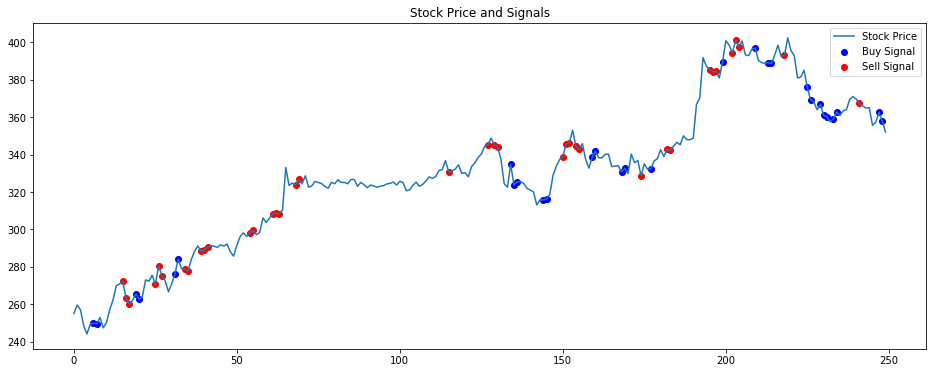

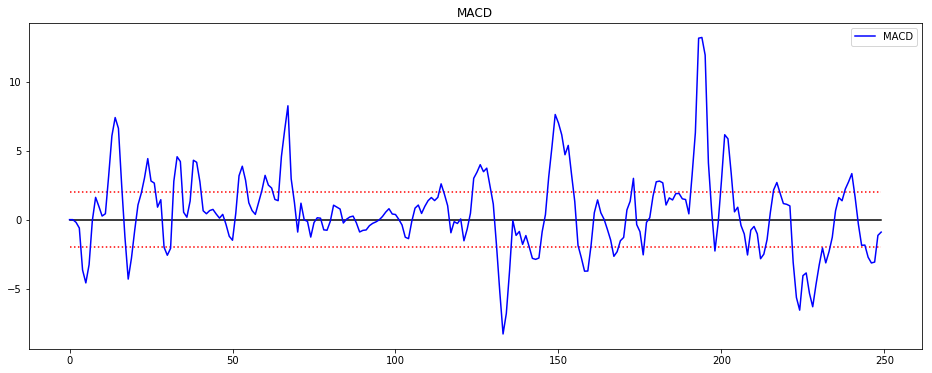

In [52]:
plot_macd_reversals(3, 6, 250, ticker='CHTR', threshold=2, show_ema=False)